In [23]:
import torch
import numpy as np
import pylab as pl
import torch.nn.init as init

# Online Guide: https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/

In [102]:
dtype = torch.FloatTensor
# since we're feeding our model with one data point at a time that is why we only need one input neuron
input_size, hidden_size, output_size = 7, 6, 1 
epochs = 300
seq_length = 20 # length of input and target sequence
lr = 0.1

In [103]:
# Generate training data, where x is an input sequence and y is a target sequence
data_time_steps = np.linspace(2, 10, seq_length+1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))
x = torch.tensor(data[:-1], requires_grad=False).type(dtype)
y = torch.tensor(data[1:], requires_grad=False).type(dtype)

In [104]:
w1 = torch.empty((input_size, hidden_size), requires_grad=True).type(dtype)
init.normal_(w1, 0.0, 0.4)
w2 = torch.empty((hidden_size, output_size), requires_grad=True).type(dtype)
init.normal_(w2, 0.0, 0.3)

tensor([[-0.2768],
        [ 0.2011],
        [ 0.2209],
        [-0.1825],
        [-0.0669],
        [-0.2074]], requires_grad=True)

In [105]:
# Define a forward method
def forward(input_, context_state, w1, w2):
    xh = torch.cat((input_, context_state), dim=1)
    context_state = torch.tanh(xh.mm(w1))
    out = context_state.mm(w2)
    return (out, context_state)

In [106]:
cs = torch.tensor([[ 0.2446,  0.6432,  0.1765, -0.3897, -0.0465, -0.1328]], requires_grad=False)
cs.data

tensor([[ 0.2446,  0.6432,  0.1765, -0.3897, -0.0465, -0.1328]])

In [107]:
for i in range(epochs):
    total_loss = 0
    context_state = torch.zeros((1, hidden_size), requires_grad=True).type(dtype)
    for j in range(x.shape[0]):
        input_ = x[j:(j+1)]
        target = y[j:(j+1)]
        (preds, context_state) = forward(input_, context_state, w1 ,w2)
        loss = (preds - target).pow(2).sum()/2
        total_loss += loss
        loss.backward()
        w1.data -= lr * w1.grad.data
        w2.data -= lr * w2.grad.data
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        context_state = context_state.data
    if i % 10 == 0:
        print("Epoch: {} loss {}".format(i, total_loss.item()))

Epoch: 0 loss 4.000146865844727
Epoch: 10 loss 0.3631530702114105
Epoch: 20 loss 0.3520149290561676
Epoch: 30 loss 0.3367551267147064
Epoch: 40 loss 0.31770601868629456
Epoch: 50 loss 0.2964634895324707
Epoch: 60 loss 0.27447310090065
Epoch: 70 loss 0.2523328959941864
Epoch: 80 loss 0.22981032729148865
Epoch: 90 loss 0.20630359649658203
Epoch: 100 loss 0.181613489985466
Epoch: 110 loss 0.15694163739681244
Epoch: 120 loss 0.13516759872436523
Epoch: 130 loss 0.11876698583364487
Epoch: 140 loss 0.10744720697402954
Epoch: 150 loss 0.09945892542600632
Epoch: 160 loss 0.09370193630456924
Epoch: 170 loss 0.08983954787254333
Epoch: 180 loss 0.08762741833925247
Epoch: 190 loss 0.08624716103076935
Epoch: 200 loss 0.08400630950927734
Epoch: 210 loss 0.0790984109044075
Epoch: 220 loss 0.07132826745510101
Epoch: 230 loss 0.0628870278596878
Epoch: 240 loss 0.05642500892281532
Epoch: 250 loss 0.05253501236438751
Epoch: 260 loss 0.050155073404312134
Epoch: 270 loss 0.0483369417488575
Epoch: 280 loss 0

In [108]:
context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad=False)
predictions = []
 
for i in range(x.size(0)):
    input_ = x[i:i+1]
    (pred, context_state) = forward(input_, context_state, w1, w2)
    context_state = context_state.data
    predictions.append(pred.data.numpy().ravel()[0])

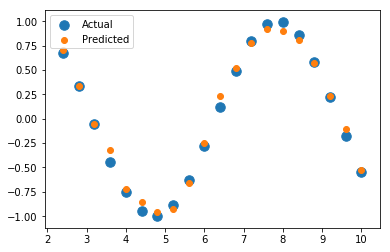

In [109]:
pl.scatter(data_time_steps[1:], y, s=90, label="Actual")
pl.scatter(data_time_steps[1:], predictions, label="Predicted")
pl.legend()
pl.show()